<a href="https://colab.research.google.com/github/AnesCenanovic/Vje-ta-kaInteligencija/blob/main/VIVje%C5%BEba6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadatak 1

a)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"{x_train.shape}")
print(f"{y_train.shape}")
print(f"{x_test.shape}")
print(f"{y_test.shape}")


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


b)

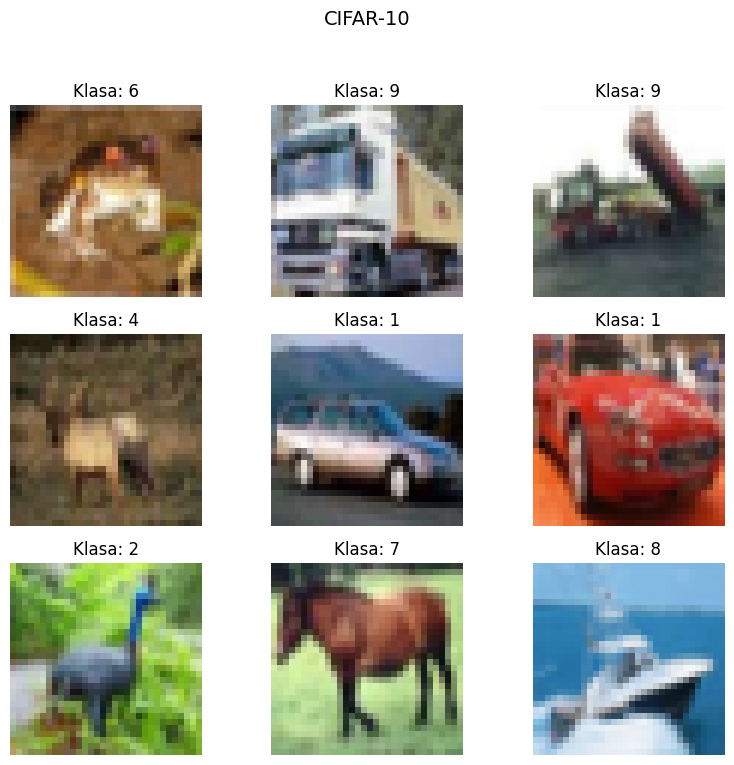

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

plt.figure(figsize=(8, 8))
plt.suptitle("CIFAR-10", fontsize=14)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(f"Klasa: {y_train[i][0]}")
  plt.axis('off')

plt.tight_layout(rect=[0,0.03,1,0.95])

plt.show()

c)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_classes = 10
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

x_train_processed = x_train.astype('float32')
x_test_processed = x_test.astype('float32')

x_train_processed /= 255.0
x_test_processed /= 255.0



Oblik test podataka (slike):    (10000, 32, 32, 3), Tip: float32
Oblik test labela (one-hot):  (10000, 10), Tip: float64
Primer trening labele (posle): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Min/Max vrednost piksela (trening posle): 0.0/1.0
Min/Max vrednost piksela (test posle):    0.0/1.0


d)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
import numpy as np

def define_model(input_shape=(32,32,3), num_classes=10):

  model = Sequential(name="Baseline_CNN")
  model. add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv1_1'))
  model. add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv1_2'))
  model.add(MaxPooling2D(pool_size=(2,2), name='pool1'))

  model. add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv2_1'))
  model. add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv2_2'))
  model.add(MaxPooling2D(pool_size=(2,2), name='pool2'))

  model.add(Flatten(name='flatten'))

  model.add(Dense(units=128, activation='relu', name='dense1'))

  model.add(Dense(units=num_classes, activation='softmax', name='output'))

  return model

model = define_model()

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

e) i f)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


num_classes = 10
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)
x_train_processed = x_train.astype('float32') / 255.0
x_test_processed = x_test.astype('float32') / 255.0

def define_model(input_shape=(32,32,3), num_classes=10):

  model = Sequential(name="Baseline_CNN")
  model. add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv1_1'))
  model. add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv1_2'))
  model.add(MaxPooling2D(pool_size=(2,2), name='pool1'))

  model. add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv2_1'))
  model. add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv2_2'))
  model.add(MaxPooling2D(pool_size=(2,2), name='pool2'))

  model.add(Flatten(name='flatten'))

  model.add(Dense(units=128, activation='relu', name='dense1'))

  model.add(Dense(units=num_classes, activation='softmax', name='output'))

  opt = SGD(learning_rate=0.001, momentum=0.9)

  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

model = define_model()

model.summary()

epochs = 15
batch_size = 64

history = model.fit(
    x_train_processed,
    y_train_categorical,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_processed, y_test_categorical),
    verbose=1
)


Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 302ms/step - accuracy: 0.1726 - loss: 2.2164 - val_accuracy: 0.3670 - val_loss: 1.8102
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 234s 299ms/step - accuracy: 0.3745 - loss: 1.7711 - val_accuracy: 0.4596 - val_loss: 1.5302
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 251s 285ms/step - accuracy: 0.4609 - loss: 1.5163 - val_accuracy: 0.4920 - val_loss: 1.4175
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 263s 287ms/step - accuracy: 0.5049 - loss: 1.3899 - val_accuracy: 0.5207 - val_loss: 1.3468
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 271s 299ms/step - accuracy: 0.5322 - loss: 1.3103 - val_accuracy: 0.5417 - val_loss: 1.2969
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 261s 298ms/step - accuracy: 0.5679 - loss: 1.2241 - val_accuracy: 0.5514 - val_loss: 1.2794
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 261s 297ms/step - accuracy: 0.5968 - loss: 1.1463 - val_accuracy: 0.5869 - val_loss: 1.1831
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 253s 286ms/step - accuracy: 0.6209 -

g)

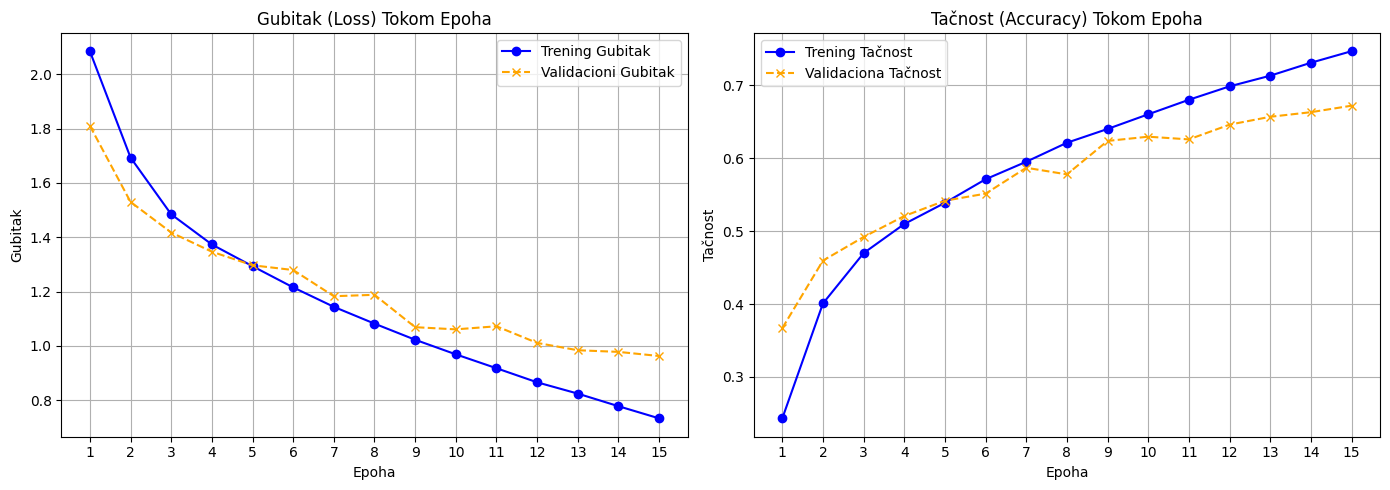

In [ ]:
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(history.history['loss'], label='Trening Gubitak', color='blue', marker='o', linestyle='-')
    ax[0].plot(history.history['val_loss'], label='Validacioni Gubitak', color='orange', marker='x', linestyle='--')
    ax[0].set_title('Gubitak (Loss) Tokom Epoha')
    ax[0].set_xlabel('Epoha')
    ax[0].set_ylabel('Gubitak')
    epochs_range = range(1, len(history.history['loss']) + 1)
    ax[0].set_xticks(np.arange(0, len(history.history['loss']), step=max(1, len(history.history['loss'])//10))) # Prikazuje oznake na x-osi
    ax[0].set_xticklabels([str(e) for e in epochs_range[::max(1, len(history.history['loss'])//10)]]) # Postavlja labele epoha
    ax[0].legend()
    ax[0].grid(True)

    ax[1].plot(history.history['accuracy'], label='Trening Tačnost', color='blue', marker='o', linestyle='-')
    ax[1].plot(history.history['val_accuracy'], label='Validaciona Tačnost', color='orange', marker='x', linestyle='--')
    ax[1].set_title('Tačnost (Accuracy) Tokom Epoha')
    ax[1].set_xlabel('Epoha')
    ax[1].set_ylabel('Tačnost')
    ax[1].set_xticks(np.arange(0, len(history.history['accuracy']), step=max(1, len(history.history['accuracy'])//10)))
    ax[1].set_xticklabels([str(e) for e in epochs_range[::max(1, len(history.history['accuracy'])//10)]])
    ax[1].legend()
    ax[1].grid(True)


    plt.tight_layout()

    plt.show()

h)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 301ms/step - accuracy: 0.1752 - loss: 2.2269 - val_accuracy: 0.3488 - val_loss: 1.8271
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 249s 286ms/step - accuracy: 0.3822 - loss: 1.7369 - val_accuracy: 0.4123 - val_loss: 1.6576
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 263s 287ms/step - accuracy: 0.4590 - loss: 1.5131 - val_accuracy: 0.4950 - val_loss: 1.4019
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 260s 285ms/step - accuracy: 0.5100 - loss: 1.3759 - val_accuracy: 0.5292 - val_loss: 1.3144
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 286ms/step - accuracy: 0.5452 - loss: 1.2778 - val_accuracy: 0.5578 - val_loss: 1.2469
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 223s 285ms/step - accuracy: 0.5726 - loss: 1.2112 - val_accuracy: 0.5732 - val_loss: 1.1900
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 233s 299ms/step - accuracy: 0.5947 - loss: 1.1374 - val_accuracy: 0.5987 - val_loss: 1.1319
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 252s 285ms/step - accuracy: 0.6165 -

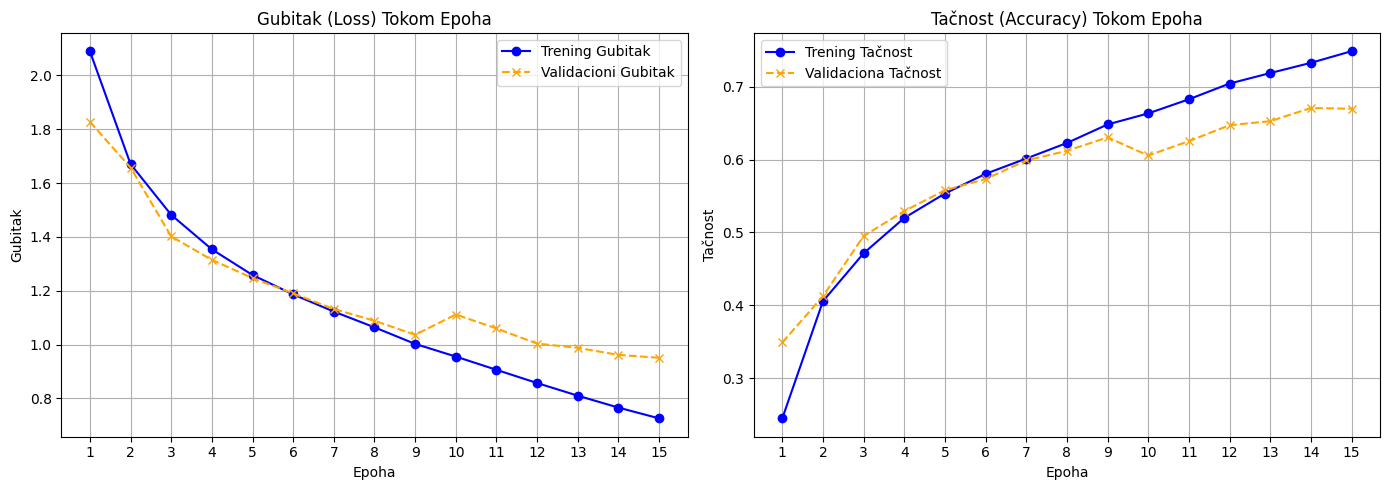

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


num_classes = 10
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)
x_train_processed = x_train.astype('float32') / 255.0
x_test_processed = x_test.astype('float32') / 255.0

def define_model_dropout(input_shape=(32,32,3), num_classes=10, dropout_rate=0.5):

  model = Sequential(name="Baseline_CNN")
  model. add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv1_1'))
  model. add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv1_2'))
  model.add(MaxPooling2D(pool_size=(2,2), name='pool1'))

  model. add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv2_1'))
  model. add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv2_2'))
  model.add(MaxPooling2D(pool_size=(2,2), name='pool2'))

  model.add(Flatten(name='flatten'))

  model.add(Dropout(dropout_rate, name='dropout1'))

  model.add(Dense(units=128, activation='relu', name='dense1'))

  model.add(Dense(units=num_classes, activation='softmax', name='output'))

  opt = SGD(learning_rate=0.001, momentum=0.9)

  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

model = define_model()

model.summary()

epochs = 15
batch_size = 64

history = model.fit(
    x_train_processed,
    y_train_categorical,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_processed, y_test_categorical),
    verbose=1
)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(history.history['loss'], label='Trening Gubitak', color='blue', marker='o', linestyle='-')
ax[0].plot(history.history['val_loss'], label='Validacioni Gubitak', color='orange', marker='x', linestyle='--')
ax[0].set_title('Gubitak (Loss) Tokom Epoha')
ax[0].set_xlabel('Epoha')
ax[0].set_ylabel('Gubitak')
epochs_range = range(1, len(history.history['loss']) + 1)
ax[0].set_xticks(np.arange(0, len(history.history['loss']), step=max(1, len(history.history['loss'])//10))) # Prikazuje oznake na x-osi
ax[0].set_xticklabels([str(e) for e in epochs_range[::max(1, len(history.history['loss'])//10)]]) # Postavlja labele epoha
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Trening Tačnost', color='blue', marker='o', linestyle='-')
ax[1].plot(history.history['val_accuracy'], label='Validaciona Tačnost', color='orange', marker='x', linestyle='--')
ax[1].set_title('Tačnost (Accuracy) Tokom Epoha')
ax[1].set_xlabel('Epoha')
ax[1].set_ylabel('Tačnost')
ax[1].set_xticks(np.arange(0, len(history.history['accuracy']), step=max(1, len(history.history['accuracy'])//10)))
ax[1].set_xticklabels([str(e) for e in epochs_range[::max(1, len(history.history['accuracy'])//10)]])
ax[1].legend()
ax[1].grid(True)


plt.tight_layout()

plt.show()

i)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Final_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_pool1 (Dropout)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_pool2 (Dropout)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_pool3 (Dropout)         │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense1 (Dropout)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 334s 425ms/step - accuracy: 0.1310 - loss: 2.2575 - val_accuracy: 0.2718 - val_loss: 2.0099
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 390s 436ms/step - accuracy: 0.2680 - loss: 1.9879 - val_accuracy: 0.3475 - val_loss: 1.8484
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 437ms/step - accuracy: 0.3331 - loss: 1.8410 - val_accuracy: 0.3928 - val_loss: 1.6741
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 438ms/step - accuracy: 0.3883 - loss: 1.6828 - val_accuracy: 0.4500 - val_loss: 1.5294
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 385s 442ms/step - accuracy: 0.4181 - loss: 1.6024 - val_accuracy: 0.4625 - val_loss: 1.4889
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 384s 444ms/step - accuracy: 0.4481 - loss: 1.5161 - val_accuracy: 0.4967 - val_loss: 1.3853
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 385s 449ms/step - accuracy: 0.4757 - loss: 1.4463 - val_accuracy: 0.5213 - val_loss: 1.3304
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 376s 442ms/step - accuracy: 0.4958 -

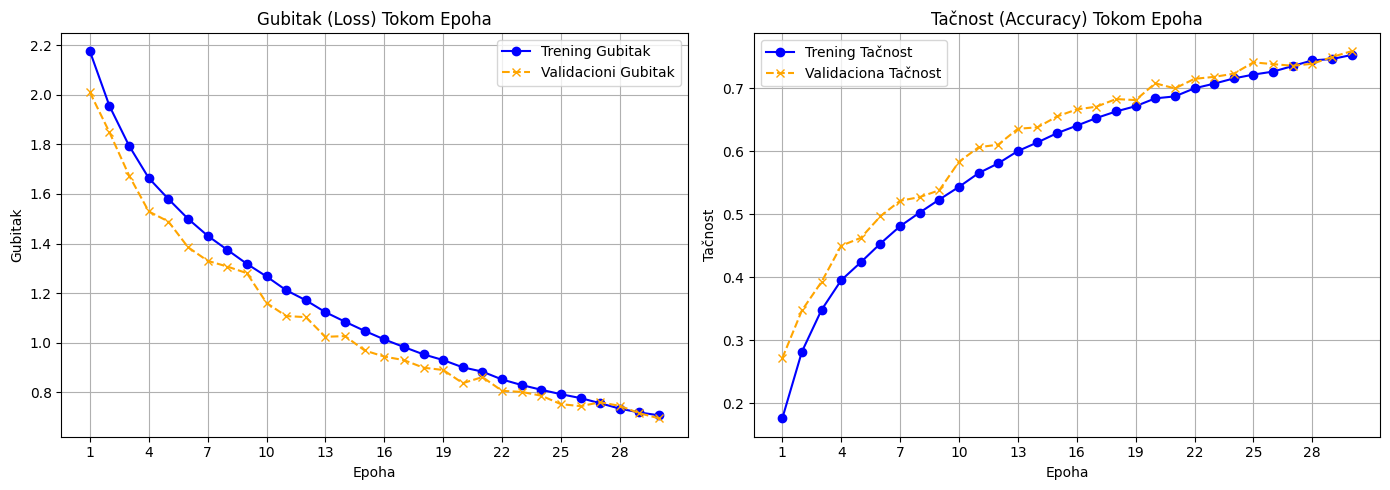

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


num_classes = 10
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)
x_train_processed = x_train.astype('float32') / 255.0
x_test_processed = x_test.astype('float32') / 255.0

def define_final_model(input_shape=(32,32,3), num_classes=10, dropout_rate=0.2):

  model = Sequential(name="Final_CNN")

  model. add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv1_1'))
  model. add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv1_2'))
  model.add(MaxPooling2D(pool_size=(2,2), name='pool1'))
  model.add(Dropout(dropout_rate, name='dropout_pool1'))

  model. add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv2_1'))
  model. add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape,
                    name='conv2_2'))
  model.add(MaxPooling2D(pool_size=(2,2), name='pool2'))
  model.add(Dropout(dropout_rate, name='dropout_pool2'))

  #new

  model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_1'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_2'))
  model.add(MaxPooling2D((2, 2), name='pool3'))

  model.add(Dropout(dropout_rate, name='dropout_pool3'))


  model.add(Flatten(name='flatten'))

  model.add(Dense(units=128, activation='relu', name='dense1'))

  model.add(Dropout(dropout_rate, name='dropout_dense1'))

  model.add(Dense(units=num_classes, activation='softmax', name='output'))

  opt = SGD(learning_rate=0.001, momentum=0.9)

  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

model = define_final_model()

model.summary()

epochs = 30
batch_size = 64

history = model.fit(
    x_train_processed,
    y_train_categorical,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_processed, y_test_categorical),
    verbose=1
)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(history.history['loss'], label='Trening Gubitak', color='blue', marker='o', linestyle='-')
ax[0].plot(history.history['val_loss'], label='Validacioni Gubitak', color='orange', marker='x', linestyle='--')
ax[0].set_title('Gubitak (Loss) Tokom Epoha')
ax[0].set_xlabel('Epoha')
ax[0].set_ylabel('Gubitak')
epochs_range = range(1, len(history.history['loss']) + 1)
ax[0].set_xticks(np.arange(0, len(history.history['loss']), step=max(1, len(history.history['loss'])//10))) # Prikazuje oznake na x-osi
ax[0].set_xticklabels([str(e) for e in epochs_range[::max(1, len(history.history['loss'])//10)]]) # Postavlja labele epoha
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Trening Tačnost', color='blue', marker='o', linestyle='-')
ax[1].plot(history.history['val_accuracy'], label='Validaciona Tačnost', color='orange', marker='x', linestyle='--')
ax[1].set_title('Tačnost (Accuracy) Tokom Epoha')
ax[1].set_xlabel('Epoha')
ax[1].set_ylabel('Tačnost')
ax[1].set_xticks(np.arange(0, len(history.history['accuracy']), step=max(1, len(history.history['accuracy'])//10)))
ax[1].set_xticklabels([str(e) for e in epochs_range[::max(1, len(history.history['accuracy'])//10)]])
ax[1].legend()
ax[1].grid(True)


plt.tight_layout()

plt.show()